In [79]:
#Importing the necessary libraries
import spacy as sp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [80]:
#Importing the beautiful soup library
import bs4
import requests as rq

In [25]:
#Installing the wikipedia library
! pip install wikipedia

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11695 sha256=08a089df99c7798aabd1ec283b91382b5081550331536f0e476e11451cc4d593
  Stored in directory: /root/.cache/pip/wheels/15/93/6d/5b2c68b8a64c7a7a04947b4ed6d89fb557dcc6bc27d1d7f3ba
Successfully built wikipedia


In [81]:
#Importing certain dependencies
nlp = sp.load('en_core_web_sm')

from spacy.matcher import Matcher 
from spacy.tokens import Span 

import urllib.request 

import networkx as nx

from tqdm import tqdm

pd.set_option('display.max_colwidth', 200)
%matplotlib inline

In [82]:
#Importing the wikipedia library to scrape text from wikipedia
import wikipedia as wk

In [83]:
#Step-1: Automating Text extraction from the respective wikipedia pages - 
#Sub-step(i): Taking input of the wikipedia page name from user
#Sub-step(ii): Re-organizing the text into paragraphs without headers
#Sub-step(iii): Taking input of the word upto which the extract to be taken
#Sub-step(iv): Writing the extract into a text file

In [84]:
#(i)
name=input("Enter the name of the wikipedia page:")
wiki=wk.page(name)
unfil_text=wiki.content

Enter the name of the wikipedia page:paracetamol


In [85]:
#(ii)
#Importing Regular Expressions library
import re
text = re.sub(r'==.*?==+', '', unfil_text)
text = text.replace('\n', '')
print(text)

Paracetamol,  also known as acetaminophen, is a medication used to treat fever and mild to moderate pain. Common brand names include Tylenol and Panadol.At a standard dose, paracetamol only slightly decreases body temperature; it is inferior to ibuprofen in that respect, and the benefits of its use for fever are unclear. Paracetamol may relieve pain in acute mild migraine but only slightly in episodic tension headache. However, the aspirin/paracetamol/caffeine combination helps with both conditions where the pain is mild and is recommended as a first-line treatment for them. Paracetamol is effective for post-surgical pain, but it is inferior to ibuprofen. The paracetamol/ibuprofen combination provides further increase in potency and is superior to either drug alone. The pain relief paracetamol provides in osteoarthritis is small and clinically insignificant. The evidence in its favor for the use in low back pain, cancer pain, and neuropathic pain is insufficient.In the short term, comm

In [86]:
#(iii)
extract_word=input("Enter word/digit/phrase upto which extract is to be taken:")
num=text.find(extract_word)
l=len(extract_word)
b=input('Enter name of file with extension:')
with open(b,'w') as fil:
  fil.write(text[:(num+l+1)])

Enter word/digit/phrase upto which extract is to be taken:prescriptions
Enter name of file with extension:final.txt


In [87]:
final_text=text[:num+l+1]

In [88]:
#Splitting the text into sentences
sen=[[i] for i in nlp(final_text).sents]

In [89]:
print(sen)

[[Paracetamol,  also known as acetaminophen, is a medication used to treat fever and mild to moderate pain.], [Common brand names include Tylenol and Panadol.], [At a standard dose, paracetamol only slightly decreases body temperature; it is inferior to ibuprofen in that respect, and the benefits of its use for fever are unclear.], [Paracetamol may relieve pain in acute mild migraine but only slightly in episodic tension headache.], [However, the aspirin/paracetamol/caffeine combination helps with both conditions where the pain is mild and is recommended as a first-line treatment for them.], [Paracetamol is effective for post-surgical pain, but it is inferior to ibuprofen.], [The paracetamol/ibuprofen combination provides further increase in potency and is superior to either drug alone.], [The pain relief paracetamol provides in osteoarthritis is small and clinically insignificant.], [The evidence in its favor for the use in low back pain, cancer pain, and neuropathic pain is insuffici

In [90]:
import csv

In [92]:
#Writing all the sentences into a csv file
myheaders = ['Sentences']
myvalues = sen
filename = 'paracetamol.csv'
with open(filename, 'w',newline='') as myfile:
    writer = csv.writer(myfile)
    writer.writerow(myheaders)
    writer.writerows(myvalues)

In [93]:
#Step-2: We try to extract the pair of related entities -
#Sub-step(i): Initialising the entity pair variables as well as dependency tags of the previous tokens
#Sub-step(ii): Running a loop in the tokenized text --> (A)Passing the token if it is a punctuation (B)Running a condition if the token is a compound word (C)Running a condition if the token is a modifier
#Sub-step(iii): If token dependency tag has subj then entity is a concatenated form of modifier, prefix and the text itself
#Sub-step(iv): If token dependency tag has obj then entity is a concatenated form of modifier, prefix and the text itself
#Sub-step(v): Updating the current texts and tags to the old texts and tags

In [129]:
#(i)
def entity_pairs(sen):
  entity_1=""
  entity_2=""
  prev_dependency_tag=""
  prev_text=""
  pref=""
  mod=""
#(ii)
  for tok in nlp(sen):
    #(A)
    if tok.dep_ != "punct":
      #(B)
      if tok.dep_ == "compound":
        pref = tok.text
        
        if prev_dependency_tag == "compound":
          pref = prev_text + " "+ tok.text
      
      #(C)
      if tok.dep_.endswith("mod") == True:
        mod = tok.text

        if prev_dependency_tag == "compound":
          mod = prev_text + " "+ tok.text
      
      #(iii)
      if tok.dep_.find("subj") == True:
        entity_1 = mod +" "+ pref + " "+ tok.text
        pref = ""
        mod = ""
        prev_dependency_tag = ""
        prev_text = ""      

      #(iv)
      if tok.dep_.find("obj") == True:
        entity_2 = mod +" "+ pref +" "+ tok.text
      #(v)  
      prev_dependency_tag = tok.dep_
      prev_text = tok.text
  return [entity_1.strip(),entity_2.strip()]


In [ ]:
#Step-3: Extracting a sentences list from the stored csv file -

In [127]:
f=open("paracetamol.csv","r")
reader = csv.DictReader(f)
sentences=[]
for column in reader:
  sentences.append(column['Sentences'])
  

In [ ]:
#Step-4: Appending all the entity pairs into a list, along with usage of the taqaddam library showing the progress

In [130]:
all_entities=[]
for j in tqdm(sentences):
  all_entities.append(entity_pairs(j))





  0%|          | 0/23 [00:00<?, ?it/s]



100%|██████████| 23/23 [00:00<00:00, 174.48it/s]


In [ ]:
#Step-5: Defining the relationship extraction function to extract the knowledge graph edges
#Sub-step(i): Defining a match object to find words and phrase relations based on vocabulary rules
#Sub-step(ii): A specific pattern to be followed is defined in the step 
#Sub-step(iii): Extracting the relation token from the nlp doc and converting to text form


In [138]:
def relation_extraction(sen):
  #(i)
  doc = nlp(sen)

  # Matcher class object 
  match = Matcher(nlp.vocab)

  #(ii)
  pattern = [{'DEP':'ROOT'}, 
            {'DEP':'prep','OP':"?"},
            {'DEP':'agent','OP':"?"},  
            {'POS':'ADJ','OP':"?"}] 

  match.add("matching_1",[pattern]) 

  matches = match(doc)
  k = len(matches) - 1
  
  #(iii)
  relation = doc[matches[k][1]:matches[k][2]] 

  return(relation.text)

In [ ]:
#Step-6: Finding the sentence count from the csv file

In [116]:
with open('paracetamol1.csv',"r") as f:
    reader = csv.reader(f,delimiter = ",")
    data = list(reader)
    row_count = len(data)
print("The number of sentences are:",row_count)

In [ ]:
#Step-7: Extracting all the relations into the relations list using the function

In [139]:
relations=[]
for i in tqdm(sentences):
  relations.append(relation_extraction(i))





  0%|          | 0/23 [00:00<?, ?it/s]



100%|██████████| 23/23 [00:00<00:00, 139.55it/s]


In [ ]:
#Step-8: Forming a knowledge graph out of the triples extracted
#Sub-step(i): Extracting the subjects
#Sub-step(ii): Extracting the objects
#Sub-step(iii): Forming a prelim dataframe with the triples
#Sub-step(iv): Utilising the networkx library to form a knowledge graph plotting using matplotlib

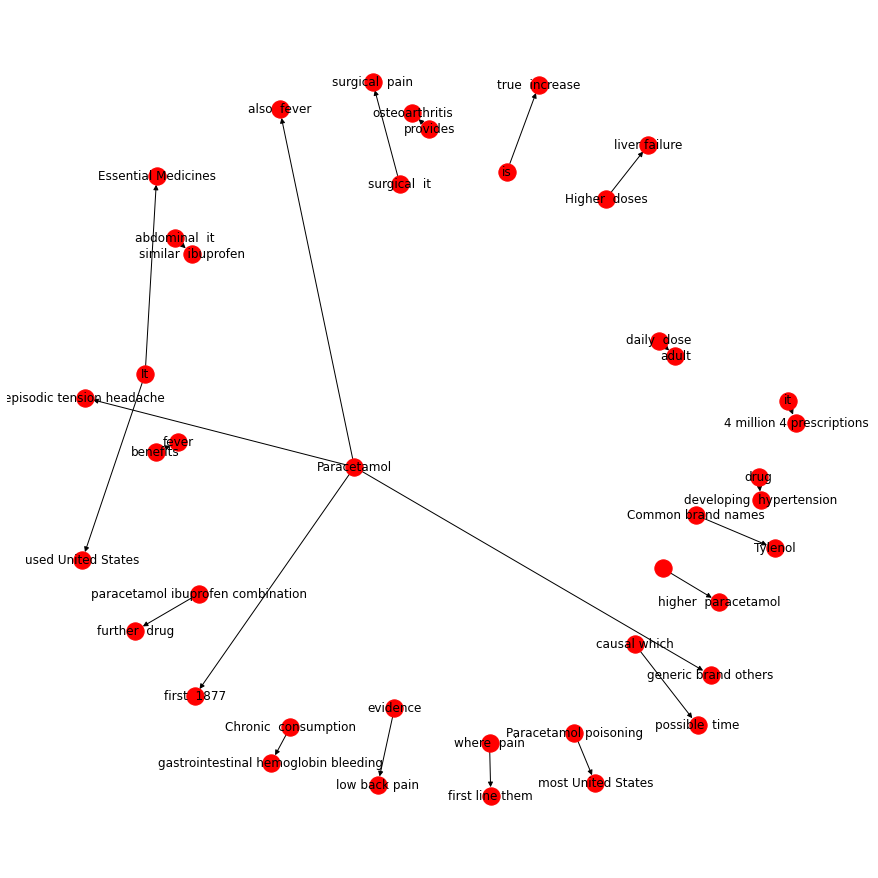

In [140]:
#(i)
source = [i[0] for i in all_entities]

#(ii)
target = [i[1] for i in all_entities]

#(iii)
kg_df = pd.DataFrame({'source':source, 'target':target, 'edge':relations})

#(iv) 
G=nx.from_pandas_edgelist(kg_df, "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())
                          

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G)
nx.draw(G, with_labels=True, node_color='red', edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

In [ ]:
#Step-9: Printing out all the triples in a list form
#Sub-step(i): Forming a final dataframe consisting of the subjects, predicates and the objects
#Sub-step(ii): Extracting the three components into different lists
#Sub-step(iii): Appending a tuple of each triple into the triples list followed by printing 

In [136]:
#(i)
final_dataframe = pd.DataFrame({'subject':source, 'predicate':relations, 'object':target})
subject=final_dataframe['subject']
predicate=final_dataframe['predicate']
obj=final_dataframe['object']
#(ii)
triples=[]
for i in range(len(subject)):
  #(iii)
  t=(subject[i],predicate[i],obj[i])
  triples.append(t)
print("The list of triples are:\n",triples)

The list of triples are:
 [('Paracetamol', 'is', 'also  fever'), ('Common brand names', 'include', 'Tylenol'), ('benefits', 'is inferior', 'fever'), ('Paracetamol', 'relieve', 'episodic tension headache'), ('where  pain', 'helps with', 'first line them'), ('surgical  it', 'is effective', 'surgical  pain'), ('paracetamol ibuprofen combination', 'provides further', 'further  drug'), ('provides', 'is small', 'osteoarthritis'), ('evidence', 'is insufficient', 'low back pain'), ('abdominal  it', 'are', 'similar  ibuprofen'), ('Chronic  consumption', 'result in', 'gastrointestinal hemoglobin bleeding'), ('', 'is', 'higher  paracetamol'), ('drug', 'increase', 'developing  hypertension'), ('is', 'observed in', 'true  increase'), ('causal which', 'suggest', 'possible  time'), ('daily  dose', 'is', 'adult'), ('Higher  doses', 'lead to', 'liver failure'), ('Paracetamol poisoning', 'is', 'most United States'), ('Paracetamol', 'made in', 'first  1877'), ('It', 'is', 'used United States'), ('It', 'i